In this data analysis project, my focus lies in understanding the pervasive influence of late-capitalism on the multifaceted aspects of contemporary society. Specifically, I aim to explore the 'aesthetic of convergence,' which centers around the idea of cultural homogenization. To this end, I have gathered a comprehensive dataset from Spotify, incorporating various features to facilitate a nuanced examination of the pertinent research questions:


"What will be the formula to create a hit song?"
"How long should an average track last according to today's standards?"
"Music listening behaviors pre-COVID vs after-COVID"


Through this exploration, I aim to contribute to a deeper comprehension of the interplay between artistic expression, commercial interests, and societal trends in the context of the modern music industry.

## Prepare Essential Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spotipy
import requests
import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from spotipy.oauth2 import SpotifyClientCredentials
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

## Prepare The Dataset

In [6]:
cid = "dac99349fb7a4fab87d1357e361e0012"
secret = "4a22925e0b2a494d9017d4bc9d98c7f7"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [7]:
pre_2020_music_url = "https://open.spotify.com/playlist/4WrehQQEAcGedInZybGhcL?si=59254a07e05c4d39"
after_2020_music_url= "https://open.spotify.com/playlist/2HakbK9b5uA1RlwozL3odE?si=de2431be54e44616"

In [9]:
df = pd.read_csv("data.csv")

## General Insights About the Data

In [10]:
df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.609,0.952,8,0.919,1,0.1690,0.03870,0.000000,0.182,0.5560,121.707,audio_features,5dLz8bhINeCWgppiUIcafp,spotify:track:5dLz8bhINeCWgppiUIcafp,https://api.spotify.com/v1/tracks/5dLz8bhINeCW...,https://api.spotify.com/v1/audio-analysis/5dLz...,157169,4
1,0.659,0.316,7,-13.136,1,0.3590,0.62700,0.000027,0.168,0.3800,96.472,audio_features,11qPxILRaVPoLVgVajD82l,spotify:track:11qPxILRaVPoLVgVajD82l,https://api.spotify.com/v1/tracks/11qPxILRaVPo...,https://api.spotify.com/v1/audio-analysis/11qP...,226933,4
2,0.689,0.915,0,-4.471,0,0.0511,0.00408,0.000005,0.102,0.7520,119.008,audio_features,7axM6HbfUTu3dXEIWOYcH1,spotify:track:7axM6HbfUTu3dXEIWOYcH1,https://api.spotify.com/v1/tracks/7axM6HbfUTu3...,https://api.spotify.com/v1/audio-analysis/7axM...,234080,4
3,0.320,0.528,1,-12.612,0,0.0340,0.58500,0.959000,0.118,0.0389,149.948,audio_features,2WQp0WTZFKQCM7Wvy3msGL,spotify:track:2WQp0WTZFKQCM7Wvy3msGL,https://api.spotify.com/v1/tracks/2WQp0WTZFKQC...,https://api.spotify.com/v1/audio-analysis/2WQp...,432000,4
4,0.596,0.575,11,-8.325,0,0.0514,0.08610,0.000153,0.334,0.3400,98.265,audio_features,3jHdKaLCkuNEkWcLVmQPCX,spotify:track:3jHdKaLCkuNEkWcLVmQPCX,https://api.spotify.com/v1/tracks/3jHdKaLCkuNE...,https://api.spotify.com/v1/audio-analysis/3jHd...,127921,3


In [11]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [12]:
df.shape

(5, 18)

In [13]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.574600,0.657200,5.400000,-7.52500,0.400000,0.132900,0.268176,0.191837,0.180800,0.413380,117.080000,235620.600000,3.800000
std,0.147202,0.270756,4.722288,5.88704,0.547723,0.137422,0.310117,0.428857,0.091909,0.265395,21.703258,118739.814268,0.447214
min,0.320000,0.316000,0.000000,-13.13600,0.000000,0.034000,0.004080,0.000000,0.102000,0.038900,96.472000,127921.000000,3.000000
25%,0.596000,0.528000,1.000000,-12.61200,0.000000,0.051100,0.038700,0.000005,0.118000,0.340000,98.265000,157169.000000,4.000000
50%,0.609000,0.575000,7.000000,-8.32500,0.000000,0.051400,0.086100,0.000027,0.168000,0.380000,119.008000,226933.000000,4.000000
75%,0.659000,0.915000,8.000000,-4.47100,1.000000,0.169000,0.585000,0.000153,0.182000,0.556000,121.707000,234080.000000,4.000000
max,0.689000,0.952000,11.000000,0.91900,1.000000,0.359000,0.627000,0.959000,0.334000,0.752000,149.948000,432000.000000,4.000000


In [14]:
for c in df.columns:
    totalNulls = df[c].isnull().sum()
    print(f'There are in total {totalNulls} null values in {c}')

There are in total 0 null values in danceability
There are in total 0 null values in energy
There are in total 0 null values in key
There are in total 0 null values in loudness
There are in total 0 null values in mode
There are in total 0 null values in speechiness
There are in total 0 null values in acousticness
There are in total 0 null values in instrumentalness
There are in total 0 null values in liveness
There are in total 0 null values in valence
There are in total 0 null values in tempo
There are in total 0 null values in type
There are in total 0 null values in id
There are in total 0 null values in uri
There are in total 0 null values in track_href
There are in total 0 null values in analysis_url
There are in total 0 null values in duration_ms
There are in total 0 null values in time_signature


In [15]:
for c in df.columns:
    totalUniques = df[c].nunique()
    print(f'There are in total {totalUniques} unique values in {c}')

There are in total 5 unique values in danceability
There are in total 5 unique values in energy
There are in total 5 unique values in key
There are in total 5 unique values in loudness
There are in total 2 unique values in mode
There are in total 5 unique values in speechiness
There are in total 5 unique values in acousticness
There are in total 5 unique values in instrumentalness
There are in total 5 unique values in liveness
There are in total 5 unique values in valence
There are in total 5 unique values in tempo
There are in total 1 unique values in type
There are in total 5 unique values in id
There are in total 5 unique values in uri
There are in total 5 unique values in track_href
There are in total 5 unique values in analysis_url
There are in total 5 unique values in duration_ms
There are in total 2 unique values in time_signature


## Data Pre-Processing

In [16]:
# Drop all rows containing null values
df.dropna(inplace = True)

In [17]:
# Drop the column unnamed:0 since it offers no values in the dataset
df.drop(columns = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], inplace = True)

KeyError: "['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'] not found in axis"

In [25]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.609,0.952,8,0.919,1,0.1690,0.03870,0.000000,0.182,0.5560,121.707,audio_features,5dLz8bhINeCWgppiUIcafp,spotify:track:5dLz8bhINeCWgppiUIcafp,https://api.spotify.com/v1/tracks/5dLz8bhINeCW...,https://api.spotify.com/v1/audio-analysis/5dLz...,157169,4
1,0.659,0.316,7,-13.136,1,0.3590,0.62700,0.000027,0.168,0.3800,96.472,audio_features,11qPxILRaVPoLVgVajD82l,spotify:track:11qPxILRaVPoLVgVajD82l,https://api.spotify.com/v1/tracks/11qPxILRaVPo...,https://api.spotify.com/v1/audio-analysis/11qP...,226933,4
2,0.689,0.915,0,-4.471,0,0.0511,0.00408,0.000005,0.102,0.7520,119.008,audio_features,7axM6HbfUTu3dXEIWOYcH1,spotify:track:7axM6HbfUTu3dXEIWOYcH1,https://api.spotify.com/v1/tracks/7axM6HbfUTu3...,https://api.spotify.com/v1/audio-analysis/7axM...,234080,4
3,0.320,0.528,1,-12.612,0,0.0340,0.58500,0.959000,0.118,0.0389,149.948,audio_features,2WQp0WTZFKQCM7Wvy3msGL,spotify:track:2WQp0WTZFKQCM7Wvy3msGL,https://api.spotify.com/v1/tracks/2WQp0WTZFKQC...,https://api.spotify.com/v1/audio-analysis/2WQp...,432000,4
4,0.596,0.575,11,-8.325,0,0.0514,0.08610,0.000153,0.334,0.3400,98.265,audio_features,3jHdKaLCkuNEkWcLVmQPCX,spotify:track:3jHdKaLCkuNEkWcLVmQPCX,https://api.spotify.com/v1/tracks/3jHdKaLCkuNE...,https://api.spotify.com/v1/audio-analysis/3jHd...,127921,3


In [20]:
# Drop all the duplicate rows in the dataset
df.drop_duplicates(inplace = True)

## Data Analysis

In [21]:
# Setting up the functions for visualizations

class DataSplit():

    def __init__(self, df):
        self.df = df
    def numericalSplit(self):
        num = self.df.select_dtypes(include = ['int64'])
        countable = []
        uncountable = []
        for c in num.columns:
            if num[c].nunique() < 100:
                countable.append(c)
            else:
                uncountable.append(c)
        return countable, uncountable
    def continousSplit(self):
        flt = self.df.select_dtypes(include = ['float64'])
        return list(flt.columns)
    def categoricalSplit(self):
        category = self.df.select_dtypes(include = ['bool', 'object'])
        return list(category.columns)

In [22]:
# Splitting the dataset into different types:
ds = DataSplit(df)
continous = ds.continousSplit()
category = ds.categoricalSplit()
countable, uncountable = ds.numericalSplit()

## Categorical Distribution

### Univariate Analysis of categorical attributes

In [23]:
category

['type', 'id', 'uri', 'track_href', 'analysis_url']

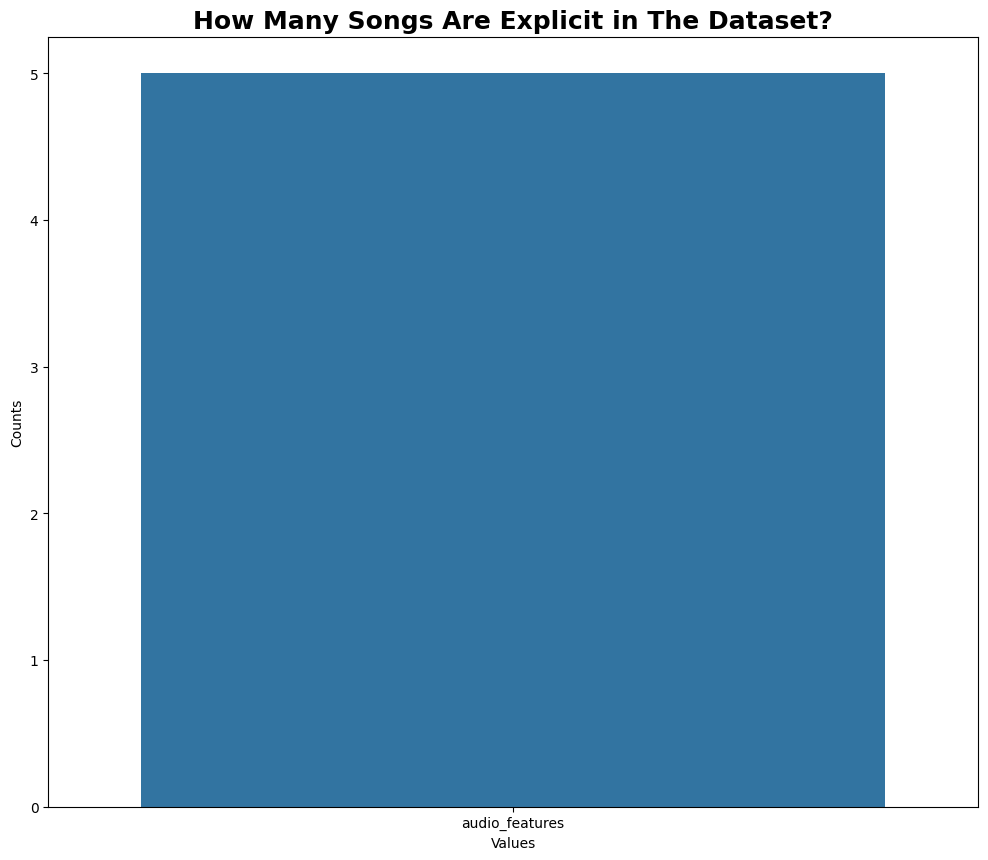

In [24]:
plt.figure(figsize = (12, 10))
fontdict = {'fontsize': 18, 'fontweight': 'bold'}
plt.title('How Many Songs Are Explicit in The Dataset?', fontdict = fontdict)
sns.countplot(data = df, x = category[0])
plt.xlabel('Values')
plt.ylabel('Counts')
plt.show()

In [ ]:
df['track_genre'].value_counts().sort_values(ascending = False)

In [ ]:
#Too many genres so we need a cluster of genres to display it properly:

df_genres = df[['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']]

scaler = StandardScaler()
scaled_features  = scaler.fit_transform(df_genres)
wcss = []

for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 9), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

#We can see that k=3 shows the optimal result

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(df_genres)
df['Clusters'] = kmeans.labels_

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

In [ ]:
for i in range(3):
    plt.scatter(pca_features[kmeans.labels_ == i, 0], pca_features[kmeans.labels_ == i, 1], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Visualization using PCA')
plt.legend()
plt.show()

In [ ]:
df.groupby('Clusters').mean()

# We can distinguish these track genres into three distinct clusters based on their discernible features:
# The first cluster (Cluster 0) comprises music characterized by relatively lower levels of energy, loudness, and tempo.
# In contrast, the second cluster (Cluster 1) is constituted by genres demonstrating high tempo, liveness, energy, and loudness.
# Finally, the third cluster (Cluster 2) encompasses music genres exhibiting an intermediate tempo level but notable danceability.

In [ ]:
plt.figure(figsize = (14, 10))
fontdict = {'fontsize': 18, 'fontweight': 'bold'}
plt.title('All genres in the dataset', fontdict = fontdict)
sns.countplot(data = df, x = category[0])
plt.xlabel('Values', fontsize = 14)
plt.ylabel('Counts')
plt.show()

In [ ]:
df['Clusters'].value_counts()

### Univariate Analysis of numerical attributes

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fontdict = {'fontsize': 12, 'fontweight': 'bold'}

for i, feat in enumerate(countable):
    sns.countplot(x = feat, data = df, ax = axes[i])
    axes[i].set_title(f'The Distribution of {feat}', fontdict = fontdict)
    axes[i].set_xlabel('Values', fontsize = 14)
    axes[i].set_ylabel('Frequency', fontsize = 14)

plt.tight_layout(w_pad= 0.5)
plt.show()

#Not so many artists use the key 3, the distribution of mode leans towards 1 and most of songs have 4 beats per bar

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fontdict = {'fontsize': 12, 'fontweight': 'bold'}

for i, feat in enumerate(uncountable):
    sns.kdeplot(x = feat, data = df, ax = axes[i])
    axes[i].set_title(f'The Distribution of {feat}', fontdict = fontdict)
    axes[i].set_xlabel('Values', fontsize = 14)
    axes[i].set_ylabel('Frequency', fontsize = 14)

plt.tight_layout(w_pad= 0.5)
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fontdict = {'fontsize': 12, 'fontweight': 'bold'}

for i, feat in enumerate(continous[:min(len(continous), 9)]):  # Ensuring hist has at least 9 items or less
    ax = axes[i // 3, i % 3]  # Properly accessing the subplots
    sns.kdeplot(x=feat, data=df, ax=ax)
    ax.set_title(f'The Distribution of {feat}', fontdict=fontdict)
    ax.set_xlabel('Values', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

plt.tight_layout(w_pad=0.5)
plt.show()

## Hypothesis Testing

### What will be the formula to create a hit song?

In [ ]:
# We will first filter out all the songs with high popularity score
df_pop = df[(df['popularity'] > 80)]

In [ ]:
#Check to see what type of cluster has the most popular songs
df_pop['Clusters'].value_counts()

In [ ]:
#Check to see what genre has the most popular songs
df_pop['track_genre'].value_counts()

In [ ]:
# Examine the distribution of feature values for each song within the 'popular' song dataset:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fontdict = {'fontsize': 12, 'fontweight': 'bold'}

for i, feat in enumerate(continous[:min(len(continous), 9)]):  # Ensuring hist has at least 9 items or less
    ax = axes[i // 3, i % 3]  # Properly accessing the subplots
    sns.kdeplot(x=feat, data=df_pop, ax=ax)
    ax.set_title(f'The Distribution of {feat}', fontdict=fontdict)
    ax.set_xlabel('Values', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

plt.tight_layout(w_pad=0.5)
plt.show()

#### To understand the above graph, we first need to examine the meanings of these features:
Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.

Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.

Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.

Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.

Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.

Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.

Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

Loudness: pretty self-explanatory.

Energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

Tempo: The pulse (BPM) of a song.




#### We can see the pattern between hit songs and all songs by comparing between two above distributions: Hit songs' distribution of danceability, loudness and energy are skewed right while its distributions of speechiness, acousticness, instrumentalness, liveness is not diverse and skewed left.

In [ ]:
# Compute the correlation matrix
corr = df[(df['popularity'] > 80)].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Music listening behaviors pre-COVID vs after-COVID

pre_2020 = []

#Initialize pagination variables
offset = 0
limit = 50

"""while True:
    try:
        results = sp.playlist_tracks(pre_2020_music_url, offset=offset, limit=limit)
        tracks = results['items']
        if len(tracks) == 0:
            break
        for track in tracks:
            # URI
            track_uri = track["track"]["uri"]
            audio_feats = sp.audio_features(track_uri)[0]
            time.sleep(0.5)  # Increased delay to reduce API requests
            track_info = sp.track(track_uri)
            audio_feats['popularity'] = track_info['popularity']
            pre_2020.append(audio_feats)
        offset += limit
    except Exception as e:
        print(f"Error occurred: {e}")
        time.sleep(5)  # Implementing a delay to handle API rate limits

pre_2020_df = pd.DataFrame(pre_2020)"""

##### The dataset contains 295 hit songs with the time_range of 3 (2017, 2018, 2019, 2020 also), shows the attributes of hit songs pre-COVID

In [ ]:
pre_2020_df

##### The dataset contains 284 hit songs with the time_range of 3 (2020, 2021, 2022, 2023), shows the attributes of hit songs pre-COVID

In [ ]:
after_2020 = []

# Initialize pagination variables
offset = 0
limit = 50

session = requests.Session()
retries = Retry(total=5, backoff_factor=1, status_forcelist=[429, 500, 502, 503, 504])
session.mount('https://', HTTPAdapter(max_retries=retries))

while True:
    try:
        results = sp.playlist_tracks(after_2020_music_url, offset=offset, limit=limit)
        tracks = results['items']
        if len(tracks) == 0:
            break
        for track in tracks:
            # URI
            track_uri = track["track"]["uri"]
            audio_feats = sp.audio_features(track_uri)[0]
            after_2020.append(audio_feats)
        offset += limit
        time.sleep(0.1)  # Adding a small delay to avoid overwhelming the API
    except Exception as e:
        print(f"Error occurred: {e}")
        time.sleep(5)  # Wait for a while before retrying

In [ ]:
after_2020_df = pd.DataFrame(after_2020)

after_2020_df

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fontdict = {'fontsize': 12, 'fontweight': 'bold'}

for i, feat in enumerate(continous[:min(len(continous), 9)]):  # Ensuring hist has at least 9 items or less
    ax = axes[i // 3, i % 3]  # Properly accessing the subplots
    sns.kdeplot(x=feat, data=after_2020_df, ax=ax)
    ax.set_title(f'The Distribution of {feat}', fontdict=fontdict)
    ax.set_xlabel('Values', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

plt.tight_layout(w_pad=0.5)
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fontdict = {'fontsize': 12, 'fontweight': 'bold'}

for i, feat in enumerate(continous[:min(len(continous), 9)]):  # Ensuring hist has at least 9 items or less
    ax = axes[i // 3, i % 3]  # Properly accessing the subplots
    sns.kdeplot(x=feat, data=pre_2020_df, ax=ax)
    ax.set_title(f'The Distribution of {feat}', fontdict=fontdict)
    ax.set_xlabel('Values', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

plt.tight_layout(w_pad=0.5)
plt.show()

In [ ]:
# Compute the correlation matrix
corr = pre_2020_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### How long should an average track last according to today's standards?

In [ ]:
after_2020_ms = round(after_2020_df['duration_ms'].mean(), 2)
pre_2020_ms = round(pre_2020_df['duration_ms'].mean(), 2)

print(f'The duration of average track pre-COVID: {after_2020_ms} The duration of average track during and after COVID {pre_2020_ms}')

#### This insight indicates an increase in term of duration